Name: SATISH PRASAD

PRN: RBT21CB018

Lab Assigment 3 : Comparative Analysis of All Spervisied Algorithms on Breast Cancer Dataset

 we tried to predict Breast Cancer using 6 different algorithm:

1) Logistic regression classification

2) SVM (Support Vector Machine) classification

3) Naive bayes classification

4) Decision tree classification

5) Random forest classification

6) K-Nearest Neighbor classification





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data= pd.read_csv("data.csv")


In [ ]:
print('Dataset :',data.shape)
x = data.iloc[:, [0, 1, 2, 3]].values
data.info()
data[0:10]

Dataset : (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perime

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
data=data.drop(columns='Unnamed: 32',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
Y = data['diagnosis']
X = data.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [ ]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 31)
Y train shape:  (455,)
X test shape:  (114, 31)
Y test shape:  (114,)


1. Logistic regression classification

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=10)

logreg.fit(X_train, Y_train)



LogisticRegression(C=10)

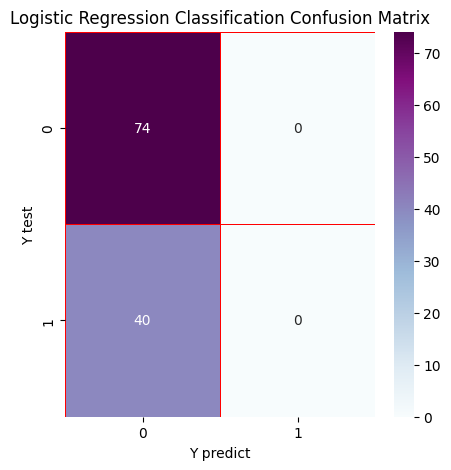

In [ ]:
Y_predict1 = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.6491228070175439


2. SVM (Support Vector Machine) classification

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True),
                                               n_jobs=-1))

svmcla.fit(X_train, Y_train)


OneVsRestClassifier(estimator=BaggingClassifier(estimator=SVC(C=10,
                                                              probability=True,
                                                              random_state=9),
                                                n_jobs=-1))

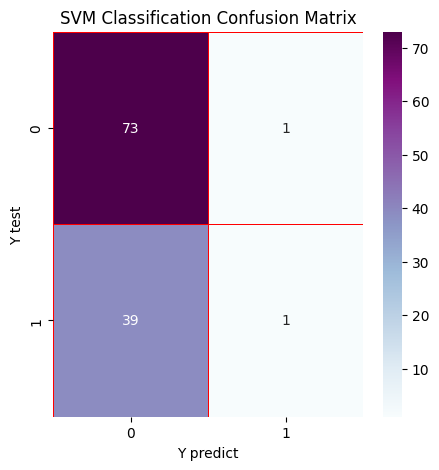

In [ ]:
Y_predict2 = svmcla.predict(X_test)
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

0.6491228070175439


3. Naive bayes classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

nbcla = GaussianNB()

nbcla.fit(X_train, Y_train)

GaussianNB()

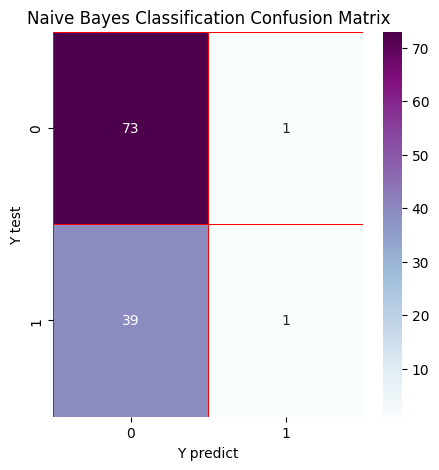

In [ ]:
Y_predict3 = nbcla.predict(X_test)
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


In [ ]:
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.6491228070175439


4. Decision tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtcla = DecisionTreeClassifier(random_state=9)

dtcla.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=9)

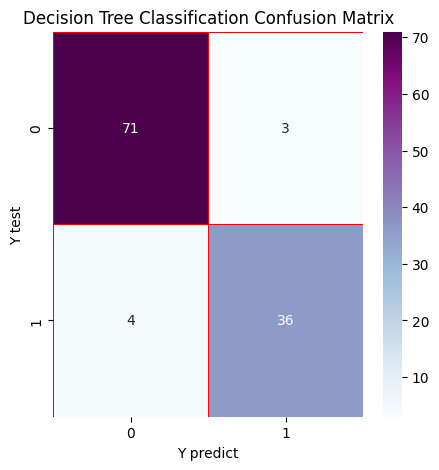

In [ ]:
Y_predict4 = dtcla.predict(X_test)
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.9385964912280702


5. Random forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

rfcla.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1, random_state=9)

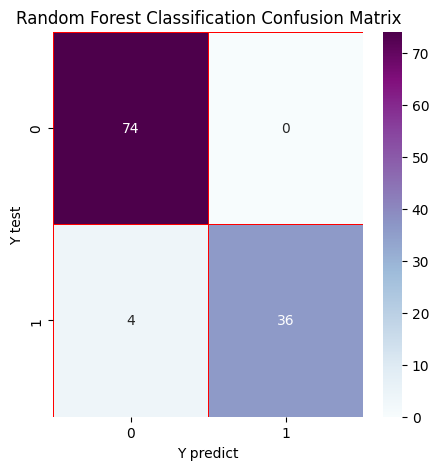

In [ ]:
Y_predict5 = rfcla.predict(X_test)
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.9649122807017544


6. K-Nearest Neighbor classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

knncla.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1)

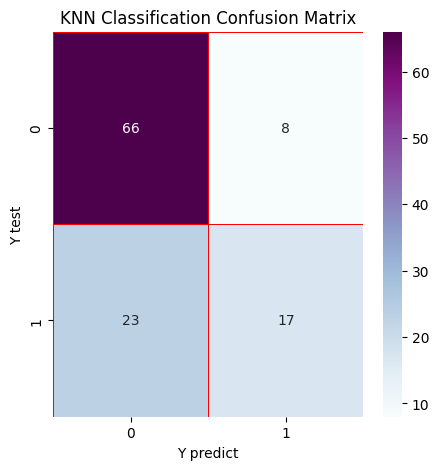

In [ ]:
Y_predict6 = knncla.predict(X_test)
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.7280701754385965


Comparison of classification techniques

Test score

In [ ]:
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla],
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score'])
print(Testscores)

Logistic Regression Score       0.649123
Support Vector Machine Score    0.649123
Naive Bayes Score               0.649123
Decision Tree Score             0.938596
Random Forest Score             0.964912
K-Nearest Neighbour Score       0.728070
dtype: float64


The confusion matrix

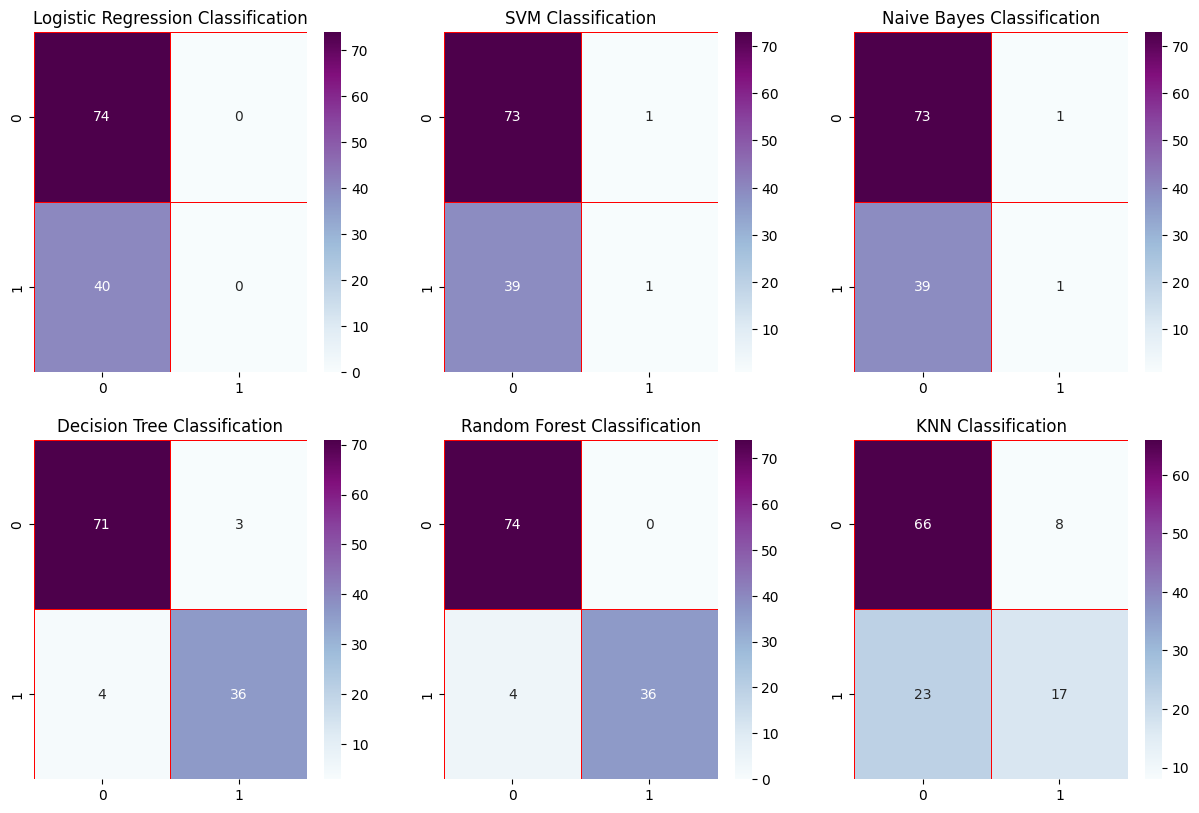

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('Logistic Regression Classification')
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax2)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax6)
plt.show()